## plot data from exome master list

##needed to set up conda env in command line 

conda create --name exome_project_20

conda activate exome_project_20

conda install -c anaconda xlrd

python -m pip install jupyterlab

python -m pip install jupyter

python -m pip install notebook

conda install pandas

pip install --upgrade matplotlib

conda install seaborn

then use exome_project_20 as python environment when launching JL

##also can use pip instead

pip install xlrd

In [1]:
##env info
!which python
!which conda
!which pip

/home/atimms/programs/miniconda3/envs/exome_project_20/bin/python
/home/atimms/programs/miniconda3/condabin/conda
/home/atimms/programs/miniconda3/envs/exome_project_20/bin/pip


In [3]:
##set up environment

##import libraries
import pandas as pd
pd.plotting.register_matplotlib_converters()
import os

##go to folder
os.chdir('/archive/mirzaa_g/exomes/result_files_at/exome_project_1120/plot_exomes_1120')

##use matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [4]:
##read in data
exome_data = pd.read_excel("master_ped_tracking_11920.xlsx", 
                    sheet_name='Ped Tracking', index_col='family_id')
##use family id as index
#exome_data = exome_data.set_index('family_id')

In [32]:
print(list(exome_data.columns))
columns_of_interest = ['classification', 'NIH Ethnicity', 'Gender* ', 'proband_sample_type', 'Status (new)']
print(exome_data[columns_of_interest].isna().sum())
exome_data['Status (new)'].value_counts()

['family_id.1', 'family_members', 'processed_samples', 'dad_samples', 'mom_samples', 'other_samples', 'proband_samples', 'affected_individuals_count', 'siblings', 'siblings_count', 'ped_type_notes', 'classification', 'type_old', 'matching_ped_type', 'identified_variant_not_found', 'verify_variant', 'comment', 'Original ethnicity', 'NIH Ethnicity', 'Gender* ', 'Pedigree', 'Analysis Type', 'Dx code list', 'DxGroup1', 'Dx Group 2', 'Dx Group 3', 'Main Gene', 'Variant', 'Notes', 'std_analysis', 'pisces', 'wes_tracking_pathogenic_gene', 'lisdb_tracking_pathogenic_gene', 'Status (old)', 'Status (new)', 'gene_name', 'variant_info', 'inheritance', 'genomic_coordinates', 'evidence', 'VAF', 'pt wes published', 'Prior Cohort', 'AT_comment', 'solved_by_other_methods', 'solved_by_other_methods_notes', 'Testing', 'Molecular Sequence Notes', 'ddPCR Results', 'NCHIP Results', 'family_id.2', 'mom_sample_id', 'mom_sample_type', 'dad_sample_id', 'dad_sample_type', 'proband_sample_id', 'proband_sample_typ

solved                     113
unsolved                   108
candidate                   55
solved by other methods     13
KIF11                        1
unsolved                     1
check                        1
VPS13B                       1
Name: Status (new), dtype: int64

In [14]:
##info about data
exome_data.head()
#exome_data.shape
#list(exome_data.columns) ##get all column names
#exome_data.classification ##get this column
#exome_data.classification.describe() ##describe not super useful
#exome_data.classification.value_counts() ##like uniq -c

,family_id.1,family_members,processed_samples,dad_samples,mom_samples,other_samples,proband_samples,affected_individuals_count,siblings,siblings_count,...,proband_format,clinically_requested,sample_discrepancy,sample_discrepancy_notes,sample_discrepancy_gm_notes,GM notes,IGV check,Secondary findings,Secondary findings – comments,KA notes
family_id,,,,,,,,,,,,,,,,,,,,,
1011,1011,"1011-0(1011-0;affected;male),1011-1(1011-1;una...","['1011-0_ref/alt', '1011-1_ref/alt', '1011-2_r...",0,0,3,0,0,NaN,0,...,NaN,0.0,1.0,Sample identifier missing because Sherr exome.,NaN,NaN,NaN,NaN,NaN,NaN
1020,1020,"1020-0(1020-0;affected;female),1020-1(1020-1;u...","['1020-0_ref/alt', '1020-1_ref/alt', '1020-2_r...",0,0,3,0,0,NaN,0,...,NaN,0.0,1.0,Sample identifier missing because Sherr exome.,NaN,NaN,NaN,NaN,NaN,NaN
1036,1036,"1036-0(1036-0;affected;male),1036-1(1036-1;una...","['1036-0_ref/alt', '1036-1_ref/alt', '1036-2_r...",0,0,3,0,0,NaN,0,...,NaN,0.0,1.0,Sample identifier missing because Sherr exome.,NaN,NaN,NaN,NaN,NaN,NaN
1090,1090,"1090-0(1090-0;affected;female),1090-1(1090-1;u...","['1090-0_ref/alt', '1090-1_ref/alt', '1090-2_r...",0,0,3,0,0,NaN,0,...,NaN,0.0,1.0,Sample identifier missing because Sherr exome.,NaN,NaN,NaN,NaN,NaN,NaN
1173,1173,"1173-0-B2(1173-0-B2;affected;male),1173-1-E1(1...","['1173-0-B2_ref/alt', '1173-1-E1_ref/alt', '11...",0,0,3,0,0,NaN,0,...,NaN,0.0,1.0,Sample identifier missing because Sherr exome.,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
##ped types
ped_type_counts = exome_data.classification.value_counts()
print(ped_type_counts)

Trio           444
Trio*           68
Singleton       48
Duo             33
Quad            21
Multiplex        9
Duo*             4
Sibship          4
Singleton*       3
Parent-sibs      1
Name: classification, dtype: int64


<class 'pandas.core.series.Series'>
69.92126107215881
10.708661377429962
7.5590550899505615
5.196850374341011
3.3070866018533707
1.4173228293657303
0.6299212574958801
0.6299212574958801
0.4724409431219101
0.15748031437397003


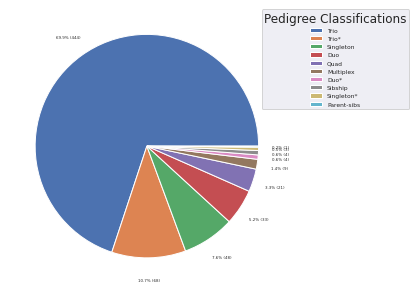

In [16]:
##lets graph the ped types into pie chart
ped_type_counts = exome_data.classification.value_counts()

print(type(ped_type_counts))

##get values as well as %s
total = len(exome_data.classification)
def my_fmt(x):
    print(x)
    return '{:.1f}% ({:.0f})'.format(x, total*x/100)

plt.rc('font', size=4) 
#plt.title('All Pedigree Types', fontsize = 8)
plt.pie(ped_type_counts, labels=ped_type_counts.index, autopct=my_fmt, labeldistance = None,
       pctdistance = 1.2)
plt.legend(title="Pedigree Classifications", loc="upper left", bbox_to_anchor=(0.9, 0.6, 0.4, 0.4), prop={'size': 6})
plt.tight_layout()
plt.savefig("all_pedigree_types.pie.pdf", bbox_inches="tight")
#plt.show()

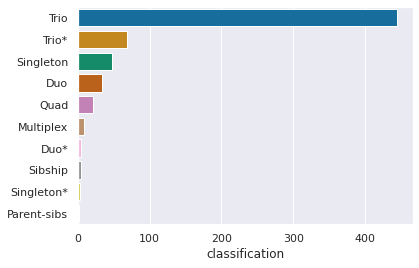

In [23]:
##seaborn alt bar chart
ped_type_counts = exome_data.classification.value_counts()

sns.barplot(y=ped_type_counts.index, x=ped_type_counts, ci=None, orient='h', palette="bright" )
plt.savefig("all_pedigree_types.barchart.pdf", bbox_inches="tight")


<class 'pandas.core.series.Series'>
80.62992095947266
8.031496405601501
5.826771631836891
3.3070866018533707
2.2047244012355804


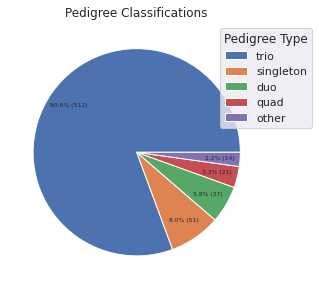

In [18]:
##graph ped types, but combine some type... use apply
def new_ped_type(row):
    if row.classification == 'Trio*' or row.classification == 'Trio':
        return 'trio'
    elif row.classification == 'Singleton*' or row.classification == 'Singleton':
        return 'singleton'
    elif row.classification == 'Duo*' or row.classification == 'Duo':
        return 'duo'
    elif row.classification == 'Quad*' or row.classification == 'Quad':
        return 'quad'
    else:
        return 'other'

ped_types = exome_data.apply(new_ped_type, axis='columns')

ped_type_counts = ped_types.value_counts()

print(type(ped_type_counts))


##get values as well as %s
total = len(exome_data.classification)
def my_fmt(x):
    print(x)
    return '{:.1f}% ({:.0f})'.format(x, total*x/100)

plt.rc('font', size=6) 
plt.title('Pedigree Classifications', fontsize =12)
plt.pie(ped_type_counts, labels=ped_type_counts.index, autopct=my_fmt, labeldistance = None,
       pctdistance = 0.8)
plt.legend(title="Pedigree Type", loc="upper left", bbox_to_anchor=(0.8, 0.6, 0.4, 0.4))
plt.tight_layout()
plt.savefig("reduced_pedigree_types.pie.pdf", bbox_inches="tight")


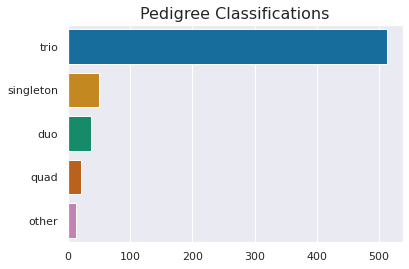

In [19]:
##barchart
plt.title('Pedigree Classifications', fontsize =16)
sns.set(font_scale=1) 
sns.barplot(y=ped_type_counts.index, x=ped_type_counts, ci=None, palette="colorblind",orient='h' )
plt.savefig("reduced_pedigree_types.barchart.pdf", bbox_inches="tight")

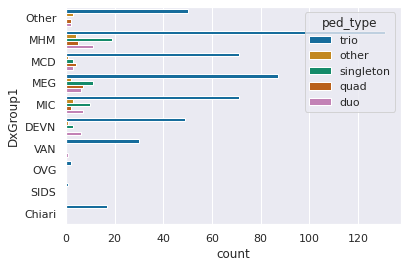

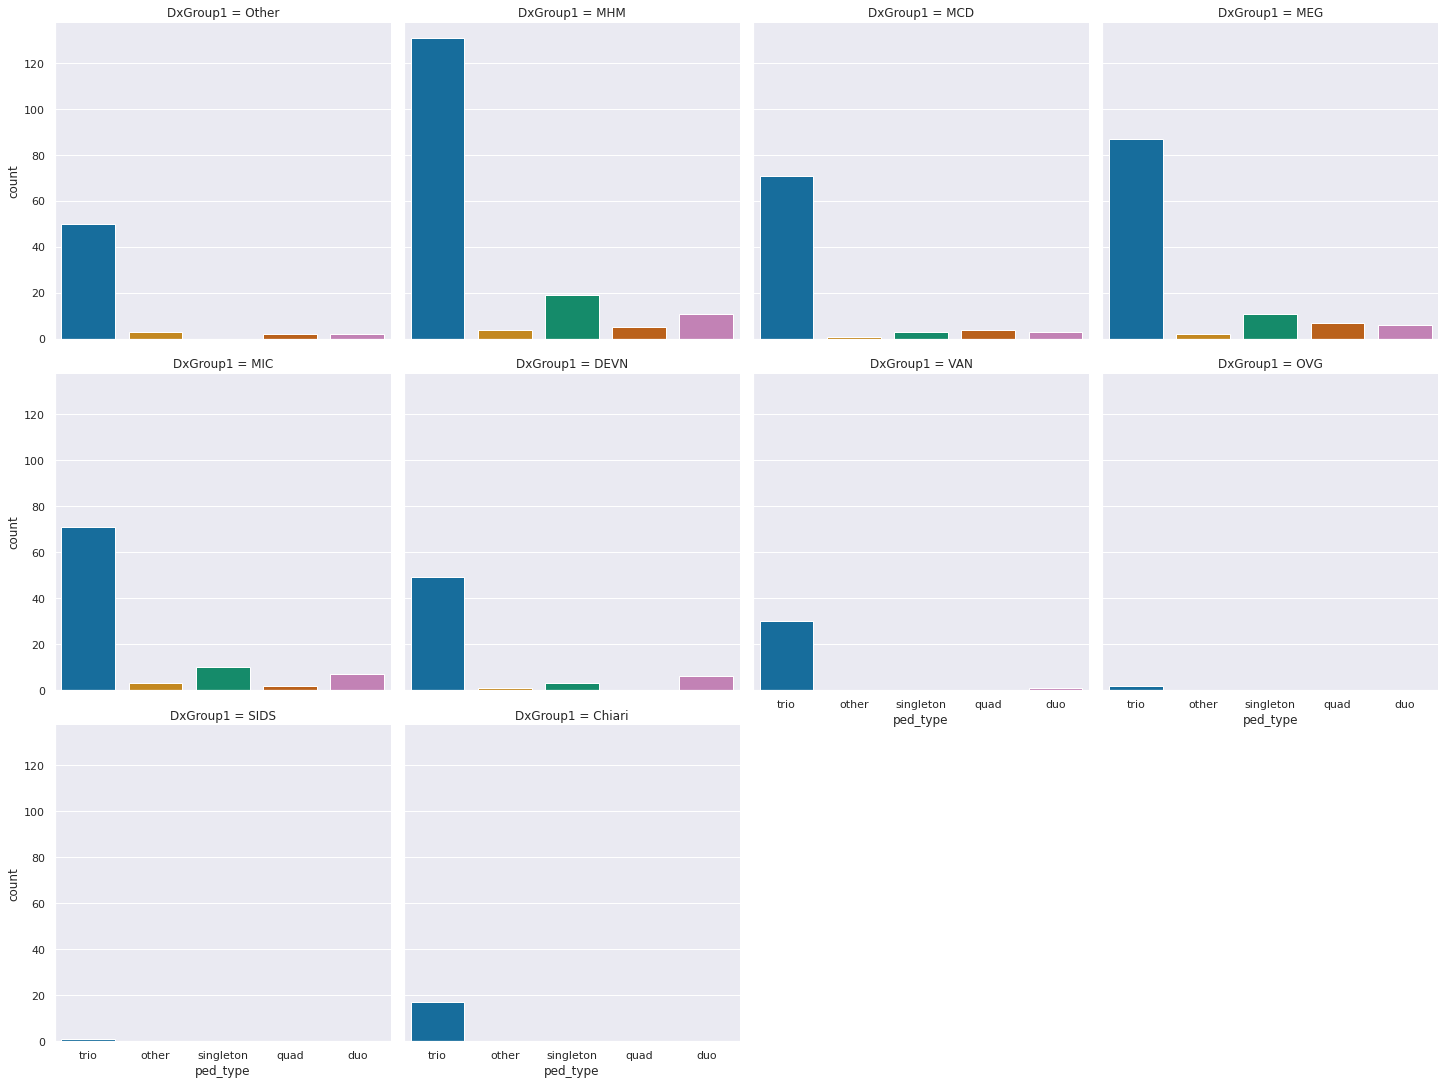

In [20]:
def new_ped_type(row):
    if row.classification == 'Trio*' or row.classification == 'Trio':
        return 'trio'
    elif row.classification == 'Singleton*' or row.classification == 'Singleton':
        return 'singleton'
    elif row.classification == 'Duo*' or row.classification == 'Duo':
        return 'duo'
    elif row.classification == 'Quad*' or row.classification == 'Quad':
        return 'quad'
    else:
        return 'other'

exome_data['ped_type'] = exome_data.apply(new_ped_type, axis='columns')

##graph 2 ways
sns.countplot(y="DxGroup1", hue="ped_type", data=exome_data, palette="colorblind")
plt.savefig("reduced_pedigree_types.dxgroup1.barchart_split1.pdf", bbox_inches="tight")
sns.catplot(x="ped_type", col="DxGroup1", data=exome_data, kind="count", col_wrap=4, palette="colorblind");
plt.savefig("reduced_pedigree_types.dxgroup1.barchart_split2.pdf", bbox_inches="tight")